# Carteras con 4 activos

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("ggplot")

### Ejercicio 1

En esta sección generalizamos el cálculo de la rentabilidad y la volatilidad de una cartera, pasando del caso de dos activos al de cuatro. Para ello, descargad los precios de los activos SPY, GLD, AAPL.O y MSFT.O para el periodo comprendido entre el 1 de enero de 2010 y el 31 de diciembre de 2025. A partir de los precios, calculad los retornos y obtened la rentabilidad esperada y la volatilidad de una cartera equiponderada (mismo peso para cada activo).

In [ ]:
# -----------------------------
# 1) Descargar precios
# -----------------------------
tickers = ["SPY", "GLD", "AAPL", "MSFT"]  # en Yahoo no se usa .O
start = "2010-01-01"
end = "2025-12-31"

precios = yf.download(
    tickers,
    start=start,
    end=end,
    auto_adjust=True,
    progress=False
)["Close"]

retornos = np.log(precios).diff().dropna()

<Figure size 800x600 with 0 Axes>

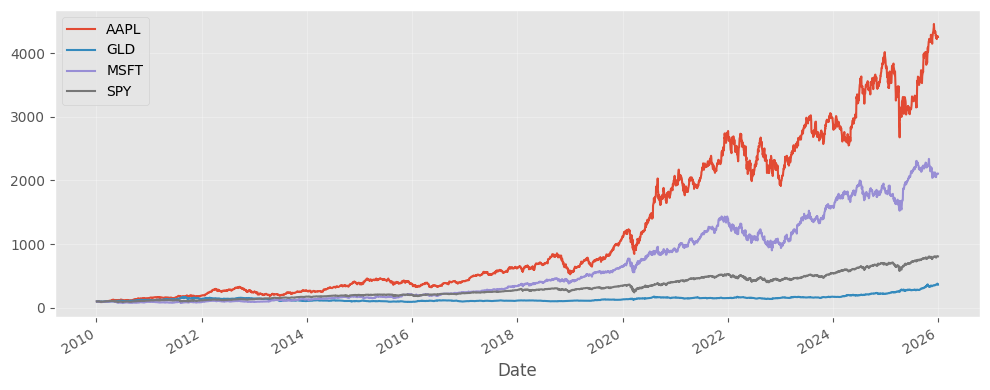

In [ ]:
# -----------------------------
# 2) Representar los precios
# -----------------------------
price_index = (precios / precios.iloc[0] * 100)

plt.figure(figsize=(8, 6))

price_index.plot(figsize=(10, 4))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# 3) Retornos esperados y covarianza
# -----------------------------
# (diarios)
mu = retornos.mean()              # vector de retornos esperados
Sigma = retornos.cov()            # matriz de covarianzas

In [ ]:
# -----------------------------
# 4) Cartera equiponderada
# -----------------------------
n = len(tickers)
w = np.ones(n) / n

port_return = float(w @ mu)                          # retorno esperado diario
port_vol = float(np.sqrt(w @ Sigma @ w))             # volatilidad diaria

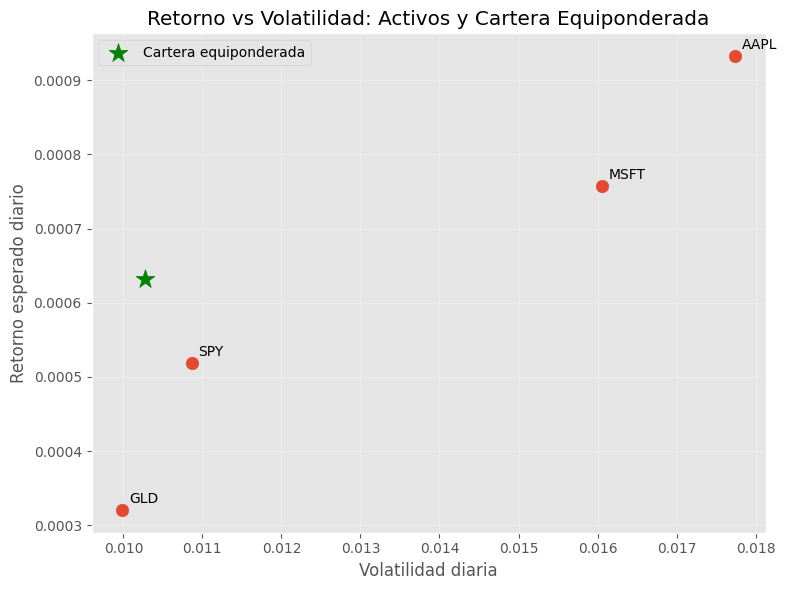

In [ ]:
# -----------------------------
# 5) Scatter plot: activos + cartera
# -----------------------------
asset_vol = retornos.std()
asset_ret = mu

plt.figure(figsize=(8, 6))

# activos
plt.scatter(asset_vol, asset_ret, s=80)
for t in tickers:
    plt.annotate(
        t,
        (asset_vol[t], asset_ret[t]),
        xytext=(5, 5),
        textcoords="offset points"
    )

# cartera
plt.scatter(port_vol, port_return, s=200, marker="*", color="green", label="Cartera equiponderada")

plt.xlabel("Volatilidad diaria")
plt.ylabel("Retorno esperado diario")
plt.title("Retorno vs Volatilidad: Activos y Cartera Equiponderada")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

### Ejercicio 2

Usando los datos de SPY, GLD, AAPL y MSFT, generad **5.000 carteras aleatorias** (pesos que sumen 1). Para cada cartera calculad su rentabilidad esperada y volatilidad, y representad todas las carteras en el plano volatilidad–rentabilidad para visualizar el efecto de la diversificación.

In [ ]:
# Generamos pesos aleatorios para 5000 carteras de 4 activos.
num_carteras = 5000
num_activos = 4

rng = np.random.default_rng(42)
pesos = rng.random(size=(num_carteras, num_activos))
pesos = pesos / np.sum(pesos, axis=1, keepdims=True)

pesos.shape

(5000, 4)

In [ ]:
retornos.shape

(4022, 4)

In [ ]:
# Calculamos los retornos de las carteras utilizando multiplicación matricial.
retornos_diarios_carteras = retornos @ pesos.T  # (4022, 4) @ (4, 5000) = (4022, 5000)

retornos_diarios_carteras.shape

(4022, 5000)

In [ ]:
# Calculamos el retorno esperado de cada cartera.
retornos_mean_carteras = retornos_diarios_carteras.mean(axis=0)

retornos_mean_carteras.shape

(5000,)

In [ ]:
# Calculamos el riesgo de cada cartera.
std_carteras = retornos_diarios_carteras.std(axis=0)

std_carteras.shape

(5000,)

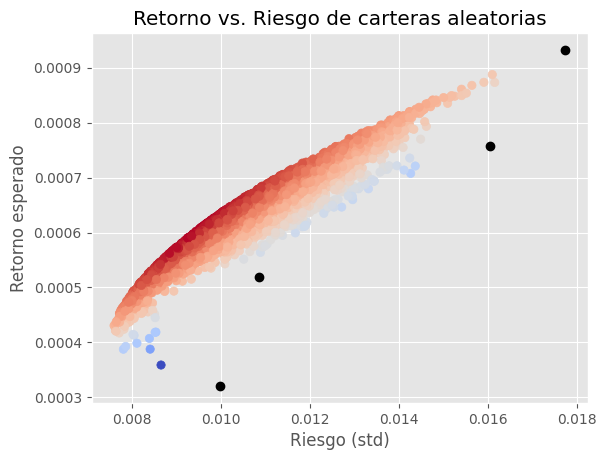

In [ ]:
# Graficamos rentabilidad vs. riesgo.
plt.scatter(x=std_carteras, y=retornos_mean_carteras, c=retornos_mean_carteras / std_carteras, marker="o", cmap="coolwarm")

# Graficamos los activos individuales.
for asset_name in retornos.columns:
    asset_ret = retornos[asset_name].mean()
    aset_std = retornos[asset_name].std()

    plt.plot(aset_std, asset_ret, "o", color="black")

plt.xlabel("Riesgo (std)")
plt.ylabel("Retorno esperado")
plt.title("Retorno vs. Riesgo de carteras aleatorias")
plt.show()

---